In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Import CSV using pandas
nyc_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory = False)

# Exploring the dataset
nyc_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


<h1>Data Analysis</h1>

<h3>Identifying dimensions and removing irrelevant data</h3>

In [130]:
# dimensions of the dataset
nyc_df.shape

(300698, 53)

In [131]:
# get dataset info
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [132]:
# Finding null values in dataset
nyc_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [133]:
# Get columns
nyc_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [134]:
# Dropping irrelevant columns based on requirements
nyc_df.drop(['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location'], inplace=True, axis=1)
nyc_df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


<h3>Finding Elapsed Time for service requests</h3>

In [135]:
# Adding new column for complaint elapsed time
nyc_df['Created Date'] = pd.to_datetime(nyc_df['Created Date'])
nyc_df['Closed Date'] = pd.to_datetime(nyc_df['Closed Date'])
nyc_df['Request_Closing_Time'] = nyc_df['Closed Date'] - nyc_df['Created Date']

nyc_df.head(10)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,BROOKLYN,Closed,The Police Department responded and upon arriv...,BROOKLYN,40.660823,-73.992568,0 days 01:53:30
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,NEW YORK,Closed,The Police Department issued a summons in resp...,MANHATTAN,40.840848,-73.937375,0 days 01:57:28
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10457.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837503,-73.902905,0 days 01:47:55
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,KEW GARDENS,Closed,The Police Department responded to the complai...,QUEENS,40.704977,-73.832605,0 days 08:33:02
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11219.0,BROOKLYN,Closed,The Police Department responded and upon arriv...,BROOKLYN,40.623793,-73.999539,0 days 01:23:02


In [136]:
# Replacing all null values with "unspecified"
nyc_df.fillna("unspecified", inplace=True)

# Checking unique values again
nyc_df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

<h1>Data Visualisation</h1>

<h3>Complaint Type based on City and it's count</h3>

In [196]:
grouped_df = pd.DataFrame({"Count": nyc_df.groupby(["Complaint Type", "City"]).size()}).reset_index()
grouped_df.sort_values("Count", ascending = False)

,Complaint Type,City,Count
83,Blocked Driveway,BROOKLYN,28148
350,Illegal Parking,BROOKLYN,27462
551,Noise - Street/Sidewalk,NEW YORK,20433
425,Noise - Commercial,NEW YORK,14550
528,Noise - Street/Sidewalk,BROOKLYN,13356
...,...,...,...
652,Posting Advertisement,LONG ISLAND CITY,1
655,Posting Advertisement,QUEENS VILLAGE,1
656,Posting Advertisement,RICHMOND HILL,1
658,Posting Advertisement,SOUTH OZONE PARK,1


<h3>Complaint Type vs Complaint Count (Bar Graph)</h3>

Text(0, 0.5, 'complaint type')

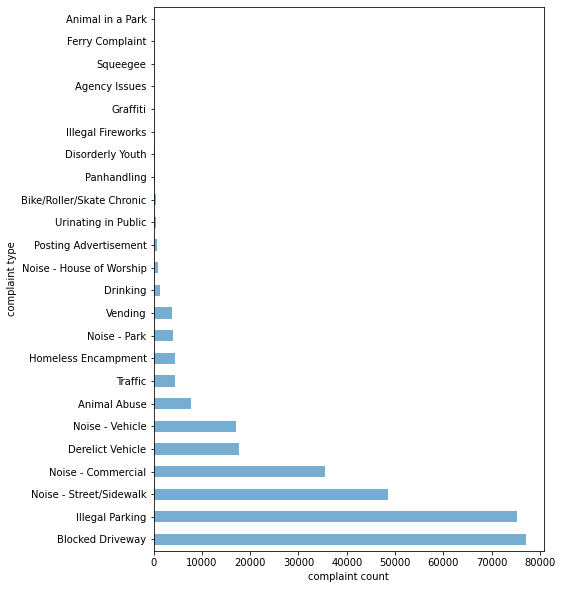

In [187]:
ax1 = nyc_df["Complaint Type"].value_counts().plot(kind = 'barh', alpha = 0.6, figsize = (7, 10))
ax1.set_xlabel("complaint count")
ax1.set_ylabel("complaint type")

As we can see in the above graph, NYPD receives maximum complaints for "Blocked Driveway"

<h3>City vs Complaint Count (Bar Graph)</h3>

Text(0, 0.5, 'city name')

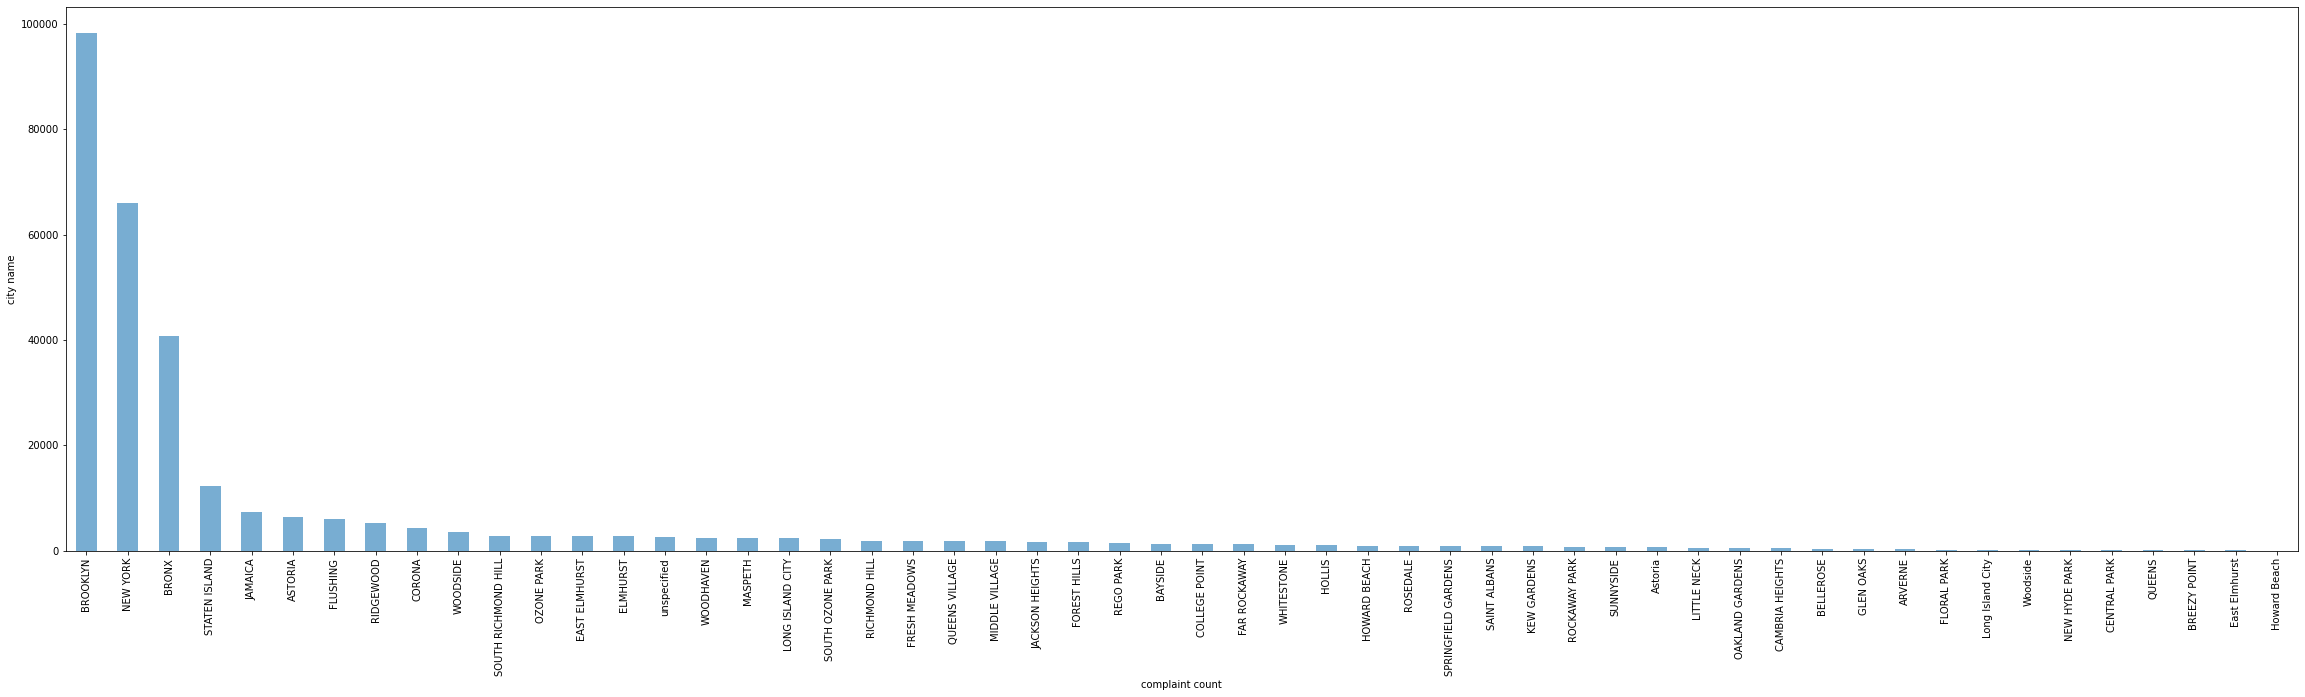

In [198]:
# City with highest number of complaints
ax2 = nyc_df["City"].value_counts().plot(kind = 'bar', alpha = 0.6, figsize = (40, 10))
ax2.set_xlabel("complaint count")
ax2.set_ylabel("city name")

As seen in the bar graph above, the city with the highest number of complaints is "Brooklyn"

In [199]:
# Finding the most common complaints in New York City
pd.DataFrame({"Complaint Count": nyc_df[nyc_df["City"] == 'BROOKLYN'].groupby(["Complaint Type", "City"]).size()})\
    .sort_values("Complaint Count", ascending = False)

,,Complaint Count
Complaint Type,City,
Blocked Driveway,BROOKLYN,28148
Illegal Parking,BROOKLYN,27462
Noise - Street/Sidewalk,BROOKLYN,13356
Noise - Commercial,BROOKLYN,11463
Derelict Vehicle,BROOKLYN,5181
Noise - Vehicle,BROOKLYN,5177
Animal Abuse,BROOKLYN,2394
Noise - Park,BROOKLYN,1555
Traffic,BROOKLYN,1085


As seen in the above table, "Blocked Driveway" is the highest reported 311 call by the people of Brooklyn.

<h3>Data Visualisation of Boroughs</h3>

In [203]:
nyc_df["Borough"]

0           MANHATTAN
1              QUEENS
2               BRONX
3               BRONX
4              QUEENS
             ...     
300693    Unspecified
300694         QUEENS
300695       BROOKLYN
300696          BRONX
300697      MANHATTAN
Name: Borough, Length: 300698, dtype: object